In [1]:
###Hide
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import grid_search
from sklearn.decomposition import PCA
from sklearn import feature_selection as fs
from sklearn.metrics import confusion_matrix
import itertools
import pickle
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Step 4: Final Models

#### Step 4.1: Evaluate Model Performance

In this step we will evaluate the final model performance by looking at its accuracy scrores, top feature selections etc.

In [2]:
# Load the models
best_overall = pickle.load(open('datasets/best_overall.pkl', 'rb'))
best_class0 = pickle.load(open('datasets/best_class0.pkl', 'rb'))
best_class1 = pickle.load(open('datasets/best_class1.pkl', 'rb'))

# Load the data
ncds_data_no_indicators = pd.read_csv('datasets/ncds_data_no_indicators.csv', delimiter=',', low_memory=False)

In [19]:
### Utility methods
# Compute confusion matrix
def plt_cnf(model, X, y):
    y_pred = model.predict(X)
    cnf_matrix = confusion_matrix(y, y_pred)
    #print cnf_matrix
    np.set_printoptions(precision=1)

    # Plot confusion matrix
    fig, ax = plt.subplots(1, 1, figsize=(15, 7))
    img1 = plot_confusion_matrix(ax, cnf_matrix, classes=[0, 1],title='Confusion matrix')

    plt.colorbar(img1, ax=ax)
    plt.show()

def plot_confusion_matrix(ax, cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    img = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)

    ax.set_yticklabels(["", "0", "", "1"], rotation=45)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return img

def find_top_features(model,n):
    # Get the feature importances
    feature_importances = pd.DataFrame(ncds_data_no_indicators.columns,columns=['feature'])
    feature_importances = feature_importances[feature_importances['feature'] != 'epileptic']

    feature_importances['importance'] = model.feature_importances_
    feature_importances = feature_importances.sort_values(['importance'], ascending=[False]).head(n)
    
    return feature_importances

# Function for computing the accuracy a given model on the entire test set,
# the accuracy on class 0 in the test set
# and the accuracy on class 1
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])],
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])


In [4]:
# Prepare data for model evaluation
x = ncds_data_no_indicators.values[:, :-1]
y = ncds_data_no_indicators.values[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


#### Model - Best Overall Performance

Model that performs well overall on both class 0 and class 1 predictions

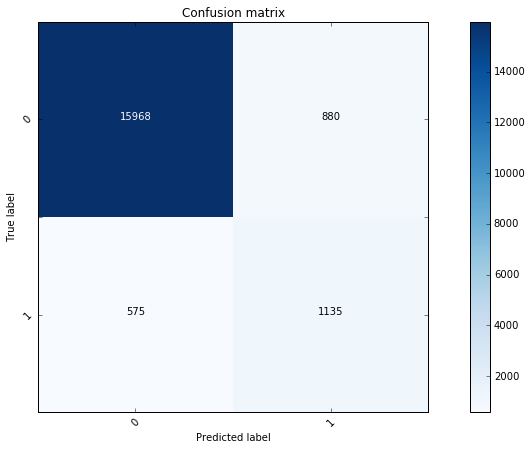

overall accuracy       0.915948
accuracy on class 0    0.944469
accuracy on class 1    0.637155
dtype: float64


In [50]:
plt_cnf(best_overall,x,y)
rf_scores = score(best_overall, x_test, y_test)
print rf_scores

##### Find the most importance features for this model

In [20]:
# Find top 10 features
top_features = find_top_features(best_overall,10)

top_features.head(10)

,feature,importance
1175,n2614,0.038719
196,n275,0.038202
1325,n2032,0.028302
195,n274,0.027948
329,n412,0.027122
1792,OUTCME01,0.019769
283,n354,0.017962
571,n1400,0.014493
1326,n2033,0.013847
3,n2region,0.013218


**Best Features:**
- n2614 - Convulsions,fits-unconsciousness
- n275 - Aptitude for Science -study child
- n2032 - Epilepsy
- n274 - Fit or convulsion in 1st year of life
- n412 - Abnormal heart
- OUTCME01 - Outcome to NCDS1 (1965)
- n354 - Other heart murmer
- n1400 - No.of times chld admitted to hospital
- n2033 - CNS condition,other than epilepsy
- n2region - Region at NCDS2 (1969) - 11 years

#### Model - Best Class 0 Performance

Model that performs well on class 0 predictions

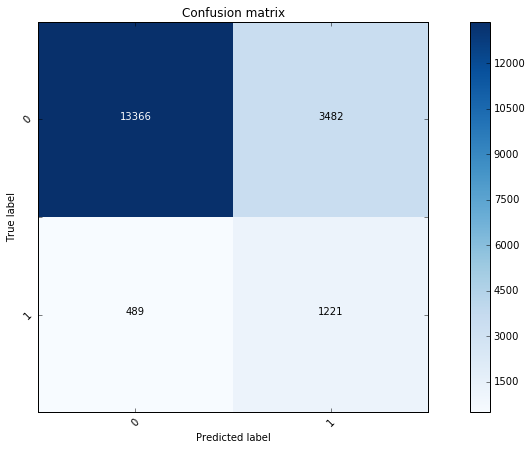

overall accuracy       0.781519
accuracy on class 0    0.792279
accuracy on class 1    0.676343
dtype: float64


In [51]:
plt_cnf(best_class0,x,y)
rf_scores = score(best_class0, x_test, y_test)
print rf_scores

##### Find the most importance features for this model

In [21]:
# Find top 10 features
top_features = find_top_features(best_class0,10)

top_features.head(10)

,feature,importance
1175,n2614,0.039365
196,n275,0.033522
283,n354,0.022786
1792,OUTCME01,0.020781
1793,OUTCME02,0.019669
195,n274,0.017247
571,n1400,0.016847
1303,n2008,0.015768
2,n1region,0.015062
1794,OUTCME03,0.013978


**Best Features:**
- n2614 - Convulsions,fits-unconsciousness
- n275 - Aptitude for Science -study child
- n354 - Other heart murmer
- OUTCME01 - Outcome to NCDS1 (1965)
- OUTCME02 - Outcome to NCDS2 (1969)
- n274 - Fit or convulsion in 1st year of life
- n1400 - No.of times chld admitted to hospital
- n2008 - Standing heel to toe for 15 secs
- n1region - Region at NCDS1 (1965) - 7 years
- OUTCME03 - Outcome to NCDS3 (1974)

#### Model - Best Class 1 Performance

Model that performs well on class 1 predictions

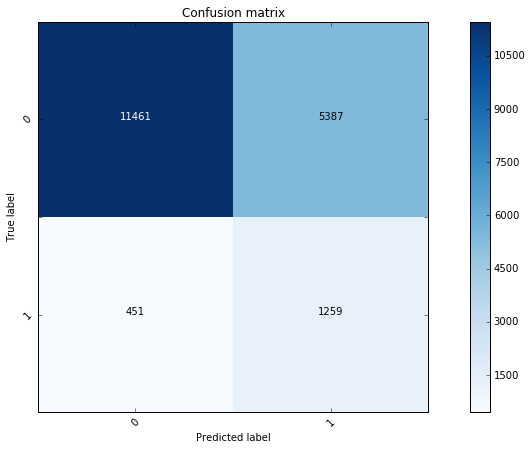

overall accuracy       0.683324
accuracy on class 0    0.679584
accuracy on class 1    0.719884
dtype: float64


In [52]:
plt_cnf(best_class1,x,y)
rf_scores = score(best_class1, x_test, y_test)
print rf_scores

##### Find the most importance features for this model

In [22]:
# Find top 10 features
top_features = find_top_features(best_class1,10)

top_features.head(10)

,feature,importance
1175,n2614,0.045283
196,n275,0.032288
1792,OUTCME01,0.021451
283,n354,0.020584
1159,n2598,0.019780
1793,OUTCME02,0.019386
2,n1region,0.019220
195,n274,0.018008
1794,OUTCME03,0.016403
52,n514,0.015545


**Best Features:**
- n2614 - Convulsions,fits-unconsciousness
- n275 - Aptitude for Science -study child
- OUTCME01 - Outcome to NCDS1 (1965)
- n354 - Other heart murmer
- n2598 - Hospital admissions,general-MC 1:4
- OUTCME02 - Outcome to NCDS2 (1969)
- n1region - Region at NCDS1 (1965) - 7 years
- n274 - Fit or convulsion in 1st year of life
- OUTCME03 - Outcome to NCDS3 (1974) 
- n514 - Status of PMS births with no NCDS1

#### Step 4.2: Use Model for Prediction

In this step we can use the model we just built to make predictions for unknown datasets. In our case we will use the models to predict for certain subsets of the data.

Let's group the data by demographics and perform predictions on each individual group
- Sex
- Country of birth
- Ethnic group 

In [61]:
def plot_by_group(list_of_group,column):
    index = np.arange(3)
    bar_width = 0.15

    for i in list_of_group:
        by_group = ncds_data_no_indicators[ncds_data_no_indicators[column] == i]
        overall = []
        class0 = []
        class1 = []
        if by_group.shape[0] > 50:
            x = by_group.values[:, :-1]
            y = by_group.values[:, -1]

            fig, ax = plt.subplots(1, 1, figsize=(7, 5))

            rf_scores = score(best_overall, x, y)
            #print rf_scores
            overall.append(rf_scores['overall accuracy'])
            class0.append(rf_scores['accuracy on class 0'])
            class1.append(rf_scores['accuracy on class 1'])
            rf_scores = score(best_class0, x, y)
            #print rf_scores
            overall.append(rf_scores['overall accuracy'])
            class0.append(rf_scores['accuracy on class 0'])
            class1.append(rf_scores['accuracy on class 1'])
            rf_scores = score(best_class1, x, y)
            #print rf_scores
            overall.append(rf_scores['overall accuracy'])
            class0.append(rf_scores['accuracy on class 0'])
            class1.append(rf_scores['accuracy on class 1'])

            ax.bar(index, overall, bar_width,alpha=0.6,color='b',label='overall')
            ax.bar(index+ bar_width, class0, bar_width,alpha=0.6,color='r',label='class 0')
            ax.bar(index+ bar_width+ bar_width, class1, bar_width,alpha=0.6,color='g',label='class 1')
            ax.set_xlabel('Group '+str(i))
            ax.set_xticks(index+bar_width)
            ax.set_xticklabels(('Model 1', 'Model 2', 'Model 3'))
            ax.set_ylabel('Scores')
            ax.legend(loc = 'best')
            ax.legend()
            plt.tight_layout()
            plt.show()

Group 1.0: Male
Group 2.0: Female


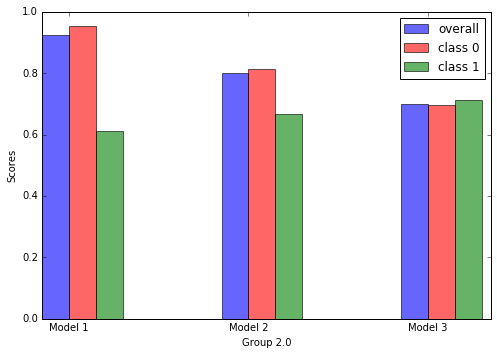

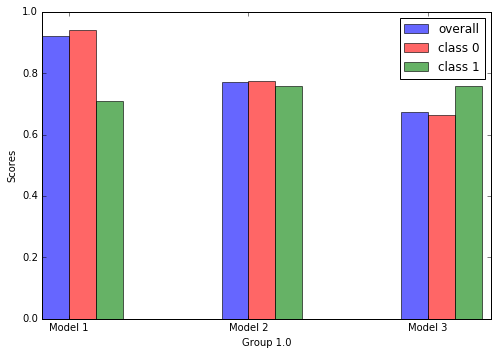

In [56]:
### Prediction by sex
list_of_sex = list(ncds_data_no_indicators['n622'].unique())

print "Group 1.0: Male" 
print "Group 2.0: Female"
plot_by_group(list_of_sex,'n622')

Country of Birth:
1.0  = England
2.0  = Wales
3.0  = Scotland
4.0  = Great Britain
9.0  = Not in Great Britain


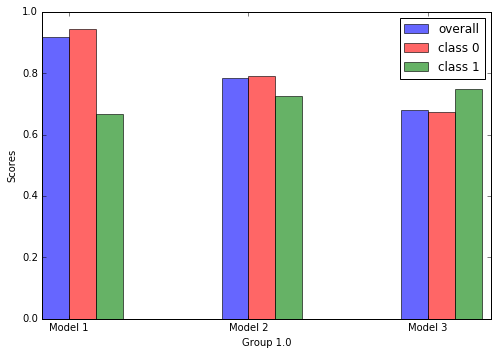

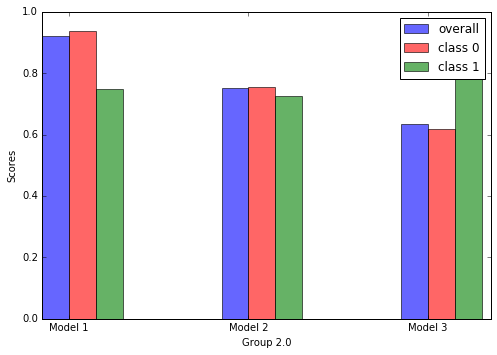

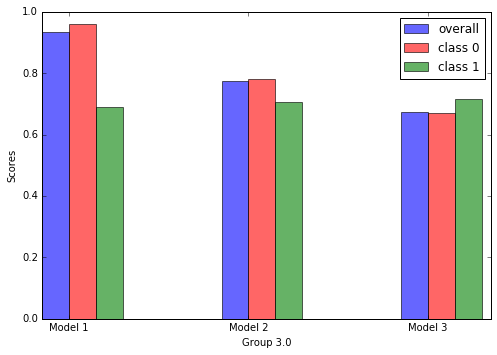

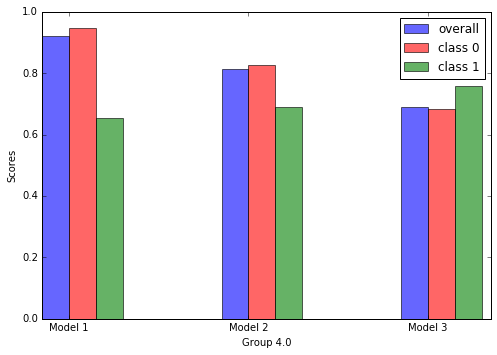

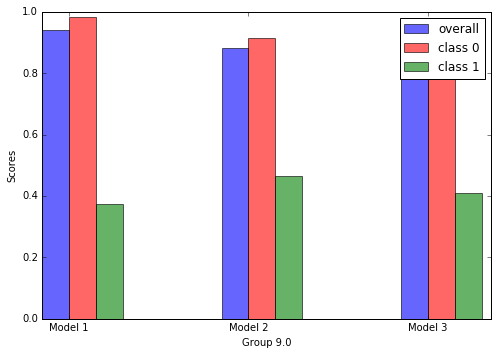

In [64]:
### Prediction based on country of birth
list_of_country = list(ncds_data_no_indicators['COBIRTH'].unique())

print "Country of Birth:"
print "1.0  = England"
print "2.0  = Wales"  
print "3.0  = Scotland"       
print "4.0  = Great Britain"  
print "9.0  = Not in Great Britain"   
plot_by_group(list_of_country,'COBIRTH')

Ethnic Group:
1.0 = White
2.0 = Mixed
3.0 = Indian
4.0 = Pakistani and Bangladeshi
5.0 = Black or Black British
6.0 = Other Ethnic group (inc Chinese,Other)
-1.0 = Not known


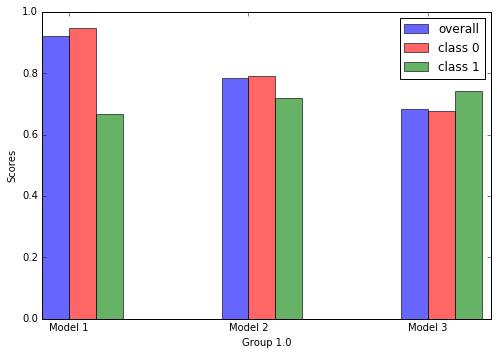

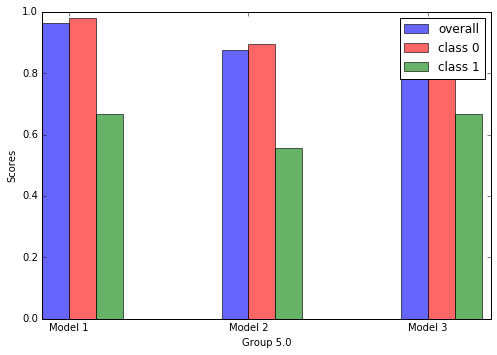

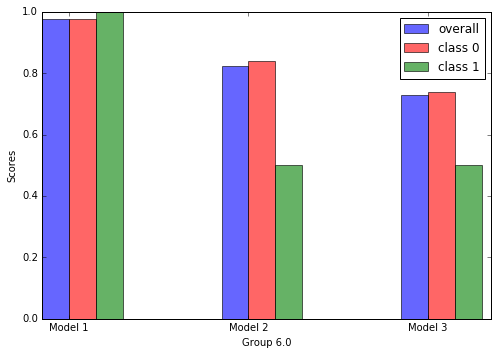

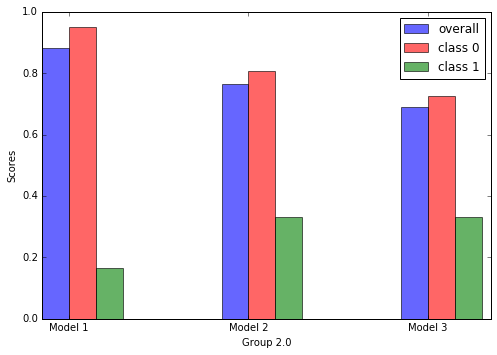

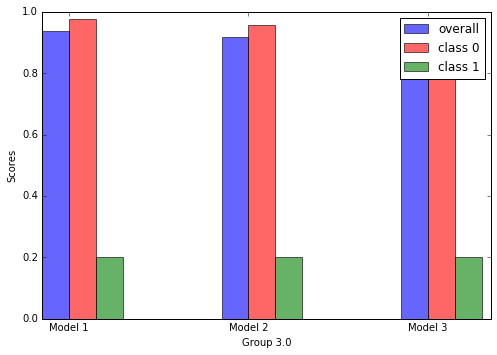

In [65]:
### Prediction based on based on ethinic group
list_of_eg = list(ncds_data_no_indicators['ETHNICID'].unique())

print "Ethnic Group:"
print "1.0 = White"  
print "2.0 = Mixed"  
print "3.0 = Indian" 
print "4.0 = Pakistani and Bangladeshi"      
print "5.0 = Black or Black British" 
print "6.0 = Other Ethnic group (inc Chinese,Other)" 
print "-1.0 = Not known"      

plot_by_group(list_of_eg,'ETHNICID')